In [1]:
#imports for user defined functions
import acquire as aq
import prepare as prep
import explore as ex

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#Imports for statistical analysis
from scipy import stats
import statistics

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#Imports for modeling and model evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Acquire and clean using user defined functions**

In [2]:
#Acquire data using user defined function 
telco = aq.get_telco_data()
#Use prepare.py to clean and split data frame
df = prep.prep_telco(telco)
train, validate, test = prep.split_telco_data(df)
#Use prepare.py to create x and y variables
X_train, y_train, X_validate, y_validate, X_test, y_test = prep.create_xy(train, validate, test)

Using cached csv...


# Modeling #

In [3]:
# Calculate the baseline for train data set

baseline = (train.churn == 1).mean()
print(f'Our baseline accuracy is {baseline}. We can compare our model accuracy to this figure.')

Our baseline accuracy is 0.2656845313690627. We can compare our model accuracy to this figure.


## Models Using All Features ##

**Decision Trees**

In [4]:
#Model 1

clf1 = DecisionTreeClassifier(random_state=123)

clf1 = clf1.fit(X_train, y_train)

In [5]:
# Creating predictions and evaluating 

X = X_validate
y = y_validate

accuracy1 = clf1.score(X, y)
y_pred = clf1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy1:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7263
The True Positive Rate is 0.474, The False Positive Rate is 0.182,
The True Negative Rate is 0.818, and the False Negative Rate is 0.526



,precision,recall,f1-score,support
0,0.811049,0.817595,0.814309,1239.000000
1,0.485194,0.474388,0.479730,449.000000
accuracy,0.726303,0.726303,0.726303,0.726303
macro avg,0.648121,0.645991,0.647019,1688.000000
weighted avg,0.724373,0.726303,0.725312,1688.000000


*Model with lower max depth to reduce overfitting.*

In [6]:
#Model 2

clf2 = DecisionTreeClassifier(max_depth=3, random_state=123)

clf2 = clf2.fit(X_train, y_train)

In [7]:
# Creating predictions and evaluating 

accuracy2 = clf2.score(X, y)
y_pred = clf2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy2:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7731
The True Positive Rate is 0.39, The False Positive Rate is 0.088,
The True Negative Rate is 0.912, and the False Negative Rate is 0.61



,precision,recall,f1-score,support
0,0.804843,0.912026,0.855089,1239.000000
1,0.616197,0.389755,0.477490,449.000000
accuracy,0.773104,0.773104,0.773104,0.773104
macro avg,0.710520,0.650890,0.666289,1688.000000
weighted avg,0.754664,0.773104,0.754649,1688.000000


**K-Nearest Neighor Model**

In [8]:
# Model 3

knn1 = KNeighborsClassifier()
knn1 = knn1.fit(X_train, y_train)

In [9]:
# Creating predictions and evaluating 

accuracy3 = knn1.score(X, y)
y_pred = knn1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy3:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7595
The True Positive Rate is 0.468, The False Positive Rate is 0.135,
The True Negative Rate is 0.865, and the False Negative Rate is 0.532



,precision,recall,f1-score,support
0,0.817696,0.865214,0.840784,1239.000000
1,0.557029,0.467706,0.508475,449.000000
accuracy,0.759479,0.759479,0.759479,0.759479
macro avg,0.687363,0.666460,0.674629,1688.000000
weighted avg,0.748360,0.759479,0.752391,1688.000000


*Model with lower K value to reduce overfitting*

In [10]:
#Model 4
# Create and fit K-Nearest Neighbor model *Default is 5

knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2 = knn2.fit(X_train, y_train)

In [11]:
# Creating predictions and evaluating 

accuracy4 = knn2.score(X, y)
y_pred = knn2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy4:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7417
The True Positive Rate is 0.465, The False Positive Rate is 0.158,
The True Negative Rate is 0.842, and the False Negative Rate is 0.535



,precision,recall,f1-score,support
0,0.812938,0.841808,0.827121,1239.000000
1,0.516049,0.465479,0.489461,449.000000
accuracy,0.741706,0.741706,0.741706,0.741706
macro avg,0.664494,0.653643,0.658291,1688.000000
weighted avg,0.733967,0.741706,0.737305,1688.000000


*Model with higher K value*

In [12]:
#Model 5
# Create and fit K-Nearest Neighbor model 

knn3 = KNeighborsClassifier(n_neighbors = 10)
knn3 = knn3.fit(X_train, y_train)

In [13]:
# Creating predictions and evaluating 

accuracy5 = knn3.score(X, y)
y_pred = knn3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy5:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7713
The True Positive Rate is 0.352, The False Positive Rate is 0.0767,
The True Negative Rate is 0.923, and the False Negative Rate is 0.648



,precision,recall,f1-score,support
0,0.797213,0.923325,0.855647,1239.000000
1,0.624506,0.351893,0.450142,449.000000
accuracy,0.771327,0.771327,0.771327,0.771327
macro avg,0.710859,0.637609,0.652895,1688.000000
weighted avg,0.751273,0.771327,0.747785,1688.000000


**Logistic Regression Models**

In [14]:
# Model 6
# Create our logistic regression model 

logit1 = LogisticRegression(random_state=123)
logit1 = logit1.fit(X_train, y_train)

In [15]:
# Creating predictions and evaluating 

accuracy6 = logit1.score(X, y)
y_pred = logit1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy6:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.798
The True Positive Rate is 0.559, The False Positive Rate is 0.115,
The True Negative Rate is 0.885, and the False Negative Rate is 0.441



,precision,recall,f1-score,support
0,0.846986,0.884584,0.865377,1239.000000
1,0.637056,0.559020,0.595492,449.000000
accuracy,0.797986,0.797986,0.797986,0.797986
macro avg,0.742021,0.721802,0.730435,1688.000000
weighted avg,0.791146,0.797986,0.793589,1688.000000


*Model with class_weight balanced*

In [16]:
# Model 7
# Create logistic regression model

logit2 = LogisticRegression(random_state=123, class_weight='balanced')
logit2 = logit2.fit(X_train, y_train)

In [17]:
# Creating predictions and evaluating 

accuracy7 = logit2.score(X, y)
y_pred = logit2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy7:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7233
The True Positive Rate is 0.784, The False Positive Rate is 0.299,
The True Negative Rate is 0.701, and the False Negative Rate is 0.216



,precision,recall,f1-score,support
0,0.899586,0.701372,0.788209,1239.000000
1,0.487535,0.783964,0.601196,449.000000
accuracy,0.723341,0.723341,0.723341,0.723341
macro avg,0.693560,0.742668,0.694702,1688.000000
weighted avg,0.789982,0.723341,0.738464,1688.000000


## Models Using Top 5 Features ##

**Random Forest Models**

In [18]:
# Model 8
# Create and fit Random Forest Model

top_5_features=['electronic_check', 'monthly_contract', 'fiber_optic', 'monthly_charges', 'paperless_billing']

rf1 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf1 = rf1.fit(X_train[top_5_features], y_train)

In [19]:
# Creating predictions and evaluating 

X = X_validate[top_5_features]
y = y_validate

accuracy8 = rf1.score(X, y)
y_pred = rf1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy8:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7435
The True Positive Rate is 0.486, The False Positive Rate is 0.163,
The True Negative Rate is 0.837, and the False Negative Rate is 0.514



,precision,recall,f1-score,support
0,0.817823,0.836965,0.827284,1239.000000
1,0.519048,0.485523,0.501726,449.000000
accuracy,0.743483,0.743483,0.743483,0.743483
macro avg,0.668435,0.661244,0.664505,1688.000000
weighted avg,0.738350,0.743483,0.740687,1688.000000


*Trying a model with different paramaters*

In [20]:
# Model 9
# Create and fit Random Forest Model

rf2 = RandomForestClassifier(min_samples_leaf=2, max_depth=15, random_state=123)
rf2 = rf2.fit(X_train[top_5_features], y_train)

In [21]:
# Creating predictions and evaluating 


accuracy9 = rf2.score(X, y)
y_pred = rf2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy9:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7316
The True Positive Rate is 0.474, The False Positive Rate is 0.175,
The True Negative Rate is 0.825, and the False Negative Rate is 0.526



,precision,recall,f1-score,support
0,0.812401,0.824859,0.818582,1239.000000
1,0.495349,0.474388,0.484642,449.000000
accuracy,0.731635,0.731635,0.731635,0.731635
macro avg,0.653875,0.649623,0.651612,1688.000000
weighted avg,0.728066,0.731635,0.729756,1688.000000


**KNN Models**

In [22]:
# Model 10
# Create and fit K-Nearest Neighbor model 

knn3 = KNeighborsClassifier()
knn3 = knn3.fit(X_train[top_5_features], y_train)

In [23]:
# Creating predictions and evaluating 

accuracy10 = knn3.score(X, y)
y_pred = knn3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy10:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7334
The True Positive Rate is 0.441, The False Positive Rate is 0.161,
The True Negative Rate is 0.839, and the False Negative Rate is 0.559



,precision,recall,f1-score,support
0,0.805577,0.839387,0.822134,1239.000000
1,0.498741,0.440980,0.468085,449.000000
accuracy,0.733412,0.733412,0.733412,0.733412
macro avg,0.652159,0.640183,0.645110,1688.000000
weighted avg,0.723960,0.733412,0.727959,1688.000000


*Try one with lower K value*

In [24]:
# Model 11
# Create and fit K-Nearest Neighbor model 

knn4 = KNeighborsClassifier(n_neighbors=3)
knn4 = knn4.fit(X_train[top_5_features], y_train)

In [25]:
# Creating predictions and evaluating 

accuracy11 = knn4.score(X, y)
y_pred = knn4.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy11:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7192
The True Positive Rate is 0.445, The False Positive Rate is 0.182,
The True Negative Rate is 0.818, and the False Negative Rate is 0.555



,precision,recall,f1-score,support
0,0.802850,0.818402,0.810552,1239.000000
1,0.470588,0.445434,0.457666,449.000000
accuracy,0.719194,0.719194,0.719194,0.719194
macro avg,0.636719,0.631918,0.634109,1688.000000
weighted avg,0.714470,0.719194,0.716686,1688.000000


**Logistic Regression Models**

In [26]:
# Model 12
#Create logistic regresssion model

logit3 = LogisticRegression(random_state=123)
logit3 = logit3.fit(X_train[top_5_features], y_train)

In [27]:


accuracy12 = logit3.score(X, y)
y_pred = logit3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy12:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7589
The True Positive Rate is 0.535, The False Positive Rate is 0.16,
The True Negative Rate is 0.84, and the False Negative Rate is 0.465



,precision,recall,f1-score,support
0,0.832800,0.840194,0.836481,1239.000000
1,0.547945,0.534521,0.541150,449.000000
accuracy,0.758886,0.758886,0.758886,0.758886
macro avg,0.690373,0.687357,0.688815,1688.000000
weighted avg,0.757030,0.758886,0.757924,1688.000000


## Models Using Top 2 Features ##

**Decision Trees**

In [28]:
# Model 13
#Create and fit our model

top_2_features = ['monthly_contract', 'fiber_optic']

clf3 = DecisionTreeClassifier(random_state=123)

clf3 = clf3.fit(X_train[top_2_features], y_train)

In [29]:
# Creating predictions and evaluating 

X = X_validate[top_2_features]
y = y_validate

accuracy13 = clf3.score(X, y)
y_pred = clf3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy13:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7387
The True Positive Rate is 0.608, The False Positive Rate is 0.214,
The True Negative Rate is 0.786, and the False Negative Rate is 0.392



,precision,recall,f1-score,support
0,0.846957,0.786118,0.815404,1239.000000
1,0.507435,0.608018,0.553191,449.000000
accuracy,0.738744,0.738744,0.738744,0.738744
macro avg,0.677196,0.697068,0.684298,1688.000000
weighted avg,0.756645,0.738744,0.745657,1688.000000


**KNN Model**

In [30]:
# Model 14
# Create and fit K-Nearest Neighbor model 

knn5 = KNeighborsClassifier(n_neighbors=3)
knn5 = knn5.fit(X_train[top_2_features], y_train)

In [31]:
# Creating predictions and evaluating 



accuracy14 = knn5.score(X, y)
y_pred = knn5.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy14:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7387
The True Positive Rate is 0.608, The False Positive Rate is 0.214,
The True Negative Rate is 0.786, and the False Negative Rate is 0.392



,precision,recall,f1-score,support
0,0.846957,0.786118,0.815404,1239.000000
1,0.507435,0.608018,0.553191,449.000000
accuracy,0.738744,0.738744,0.738744,0.738744
macro avg,0.677196,0.697068,0.684298,1688.000000
weighted avg,0.756645,0.738744,0.745657,1688.000000


**Compare all my Models Scores to decide which to use on evaluate and the test**

In [32]:
print(f'''Model 1: {accuracy1}''')
print(f'''Model 2: {accuracy2}''')
print(f'''Model 3: {accuracy3}''')
print(f'''Model 4: {accuracy4}''')
print(f'''Model 5: {accuracy5}''')
print(f'''Model 6: {accuracy6}''')
print(f'''Model 7: {accuracy7}''')
print(f'''Model 8: {accuracy8}''')
print(f'''Model 9: {accuracy9}''')
print(f'''Model 10: {accuracy10}''')
print(f'''Model 11: {accuracy11}''')
print(f'''Model 12: {accuracy12}''')
print(f'''Model 13: {accuracy13}''')
print(f'''Model 14: {accuracy14}''')

Model 1: 0.726303317535545
Model 2: 0.7731042654028436
Model 3: 0.759478672985782
Model 4: 0.7417061611374408
Model 5: 0.7713270142180095
Model 6: 0.7979857819905213
Model 7: 0.7233412322274881
Model 8: 0.7434834123222749
Model 9: 0.7316350710900474
Model 10: 0.7334123222748815
Model 11: 0.7191943127962085
Model 12: 0.7588862559241706
Model 13: 0.7387440758293838
Model 14: 0.7387440758293838


**I'll select the best performing model from these to use on the test data set.**

**Model 6 is my best performing model at 80% accuracy.**

**What are my top 3 scores when fit to the validate data set?**

Decision: 
- While Model 6 is techinically the bet performing model, it uses all 14 variables and I wasn't able to check that every single variable is statistically significant so my error score may be quite high. It is likely to be overfit and not perform as well on new real world data.
- As such as I will use Model 12 as my best as it still has an accuracy of 76% using only 5 variables reducing dimensionality. I will fit this model to the test data set.

In [43]:
# Evaluating Model 12 on test 
X = X_test[top_5_features]
y = y_test 

accuracy12 = logit3.score(X, y)
y_pred = logit3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy12:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7612
The True Positive Rate is 0.529, The False Positive Rate is 0.155,
The True Negative Rate is 0.845, and the False Negative Rate is 0.471



,precision,recall,f1-score,support
0,0.832221,0.845111,0.838617,1033.000000
1,0.553073,0.529412,0.540984,374.000000
accuracy,0.761194,0.761194,0.761194,0.761194
macro avg,0.692647,0.687262,0.689800,1407.000000
weighted avg,0.758020,0.761194,0.759502,1407.000000


**Create Predictions CSV File**

In [36]:
# Create a copy of test dataframe
test_predictions = test.copy()
test_predictions['prediction'] = y_pred

In [37]:
# Create dataframe for visualization purposes
prediction_vis = test_predictions[['customer_id', 'churn', 'prediction']]
prediction_vis = prediction_vis.rename(columns={'churn': 'actual_churn'})
prediction_vis

,customer_id,actual_churn,prediction
3311,4716-MRVEN,0,0
6330,8966-KZXXA,0,0
6156,8720-RQSBJ,0,0
5313,7504-UWHNB,0,1
1176,1730-VFMWO,0,0
...,...,...,...
600,0877-SDMBN,1,0
3946,5555-RNPGT,0,0
3230,4628-CTTLA,1,0
349,0516-QREYC,0,0


In [38]:
# Use only necessary columns for CSV
predictions = test_predictions[['customer_id','prediction']]
predictions = predictions.reset_index().drop(columns='index')

In [39]:
#Calculate prediction probability and concatenate
proba = pd.DataFrame(rf1.predict_proba(X_test[top_5_features]))
predictions = pd.concat([predictions, proba], axis=1)
predictions = predictions.rename(columns={1: 'churn_probability'})
predictions = predictions.drop(columns= 0)
predictions.head()

,customer_id,prediction,churn_probability
0,4716-MRVEN,0,0.002448
1,8966-KZXXA,0,0.008117
2,8720-RQSBJ,0,0.157821
3,7504-UWHNB,1,0.820766
4,1730-VFMWO,0,0.281080


In [40]:
#Create CSV
predictions.to_csv('predictions.csv')

**Visualize model predictions**

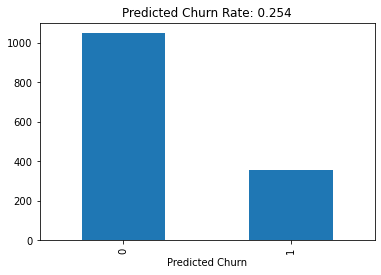

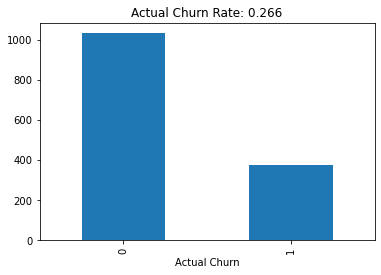

In [41]:
prediction_vis.prediction.value_counts().sort_index().plot.bar()
predicted_churn_rate = prediction_vis.prediction.mean()
plt.title(f'Predicted Churn Rate: {predicted_churn_rate:.3}')
plt.xlabel('Predicted Churn')
plt.show()

prediction_vis.actual_churn.value_counts().sort_index().plot.bar()
actual_churn_rate = prediction_vis.actual_churn.mean()
plt.title(f'Actual Churn Rate: {actual_churn_rate:.3}')
plt.xlabel('Actual Churn')
plt.show()